In [1]:
%config IPCompleter.greedy=True
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from collections import defaultdict
import sklearn
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


# ##########   one time run   ############
# import subprocess
# import os
# import numpy as np
# import random
# np.random.seed(100)
# experiments = ["exp1","exp2","exp3","exp4","exp5"]
# nsplit = [30,30,10,10,10]
# allesfile = os.listdir("food-101_sep/images/train")
# datatypes = ["train","val"]

# datadir = "datasplitted/"

# subprocess.run("mkdir datasplitted".split())

# for i,exp in enumerate(experiments):
#     foldername = "mkdir "+datadir+exp
#     #creating folders
#     if not os.path.isdir(datadir+exp):
#         subprocess.run(foldername.split())
#         for d in datatypes:
#             dfolder = "mkdir "+datadir+exp+"/"+d+"/"
#             subprocess.run(dfolder.split())

#     #copying images to folders
#     choosenfolder = []

#     for d in datatypes:
#         if d!="val":
#             choosenfolder = np.random.choice(allesfile,nsplit[i],replace=False)

#             copydir =datadir+exp+"/"+d
#             for ch in choosenfolder:
#                 command = "cp -rf "+"food-101_sep/images/"+d+"/"+ch+" "+"datasplitted/"+exp+"/"+d+""
#                 subprocess.run(command.split())
#         else:
#             for ch in choosenfolder:
#                 command = "cp -rf "+"food-101_sep/images/"+d+"/"+ch+" "+"datasplitted/"+exp+"/"+d+""
#                 subprocess.run(command.split())

# ##########   one time run   ############
                
plt.ion()
             
if torch.cuda.is_available():
    avDev = torch.device("cuda")
else:
    avDev = torch.device("cpu")

print(avDev)

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

########## parameter to be changed
batch = 40
data_dir = 'datasplitted/exp2'
epochs = 5
########## parameter to be changed

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

no_of_class = len(class_names)

def imshow(inp, title=None):
    """Imshow for Tensor."""
    plt.figure(figsize = (20,4))
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,aspect='auto')
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated



#inputs, classes = next(iter(dataloaders['train']))
#out = torchvision.utils.make_grid(inputs)
#imshow(out, title=[class_names[x] for x in classes])

cuda


In [2]:
def save_model(model, name):
    if not os.path.exists('saved_models/'):
        os.makedirs('saved_models/')
    torch.save(model.state_dict(), 'saved_models/{}.bin'.format(name))

model= models.resnet34(pretrained=True)
model.fc = nn.Linear(512,no_of_class)
model.to(avDev)

state_dict = torch.load('saved_models/30_exp2_resnet_svm.bin')
model.load_state_dict(state_dict)

LEARNING_RATE = 0.01

criterion = nn.CrossEntropyLoss() #Use cross entropy loss
optimizer = torch.optim.SGD(model.parameters(),lr=LEARNING_RATE)


In [ ]:
from tqdm import tqdm

train_results = defaultdict(list)
train_iter, test_iter, best_acc = 0, 0, 0

for i in range(epochs):

    print("Epoch ", i)
    model.train()
    
    count, loss_val, correct, total = train_iter, 0, 0, 0
    
    for data, target in tqdm(dataloaders['train'], desc = 'Training'):
        data, target = data.to(avDev), target.to(avDev)
            
        output = model(data)
        
        loss = criterion(output, target)
        c_loss = loss.data.item()
        
        loss_val += c_loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        predicted = output.data.max(1)[1]
        total += target.size(0)
        c_acc = (predicted == target).sum().item()
        correct += c_acc
        count += 1
        
    train_loss_val, train_iter, train_acc = loss_val / len(dataloaders['train'].dataset), count, correct / float(total)
    if train_acc>=best_acc:
            save_model(model,'30_exp2_resnet_svm')
            best_acc= train_acc
            print("SAVING BEST Model: ",train_acc)
    print("Training loss: ", train_loss_val, " train acc: ", train_acc)

    

Training:   0%|          | 0/563 [00:00<?, ?it/s]

Epoch  0


Training:   0%|          | 0/563 [00:00<?, ?it/s]

SAVING BEST Model:  0.6218666666666667
Training loss:  0.03491482397715251  train acc:  0.6218666666666667
Epoch  1


Training:   0%|          | 0/563 [00:00<?, ?it/s]

SAVING BEST Model:  0.7572444444444445
Training loss:  0.021417008482085335  train acc:  0.7572444444444445
Epoch  2


Training:   0%|          | 0/563 [00:00<?, ?it/s]

SAVING BEST Model:  0.7839555555555555
Training loss:  0.01887502095633083  train acc:  0.7839555555555555
Epoch  3


Training:   0%|          | 0/563 [00:00<?, ?it/s]

SAVING BEST Model:  0.7979555555555555
Training loss:  0.01759227952692244  train acc:  0.7979555555555555
Epoch  4


Training: 100%|█████████▉| 561/563 [23:00<00:03,  1.67s/it]

In [3]:
from tqdm import tqdm
features, labels = [], []

model = nn.Sequential(*(list(model.children())[:-1]))

for data, target in tqdm(dataloaders['train'], desc = 'Feature Extraction'):
        data, target = data.to(avDev), target.to(avDev)
        output = model(data) 
        features.append(output.data.cpu().numpy())
        labels.append(target.data.cpu().numpy())

Feature Extraction: 100%|██████████| 563/563 [24:31<00:00,  2.61s/it]


In [4]:
print(np.array(np.vstack(features)).shape)
f = np.array(np.vstack(features)).reshape(no_of_class*750 ,512)
l = np.array(np.hstack(labels))

svmmodel = LinearSVC(C=100)
svmmodel.fit(np.array(f),np.array(l))


(22500, 512, 1, 1)


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [5]:
model.eval()

test_iter = 0
count, correct, total, loss_val = test_iter, 0, 0, 0

predicted = []
actual = []

for data1, target in tqdm(dataloaders['val'], desc = 'Validation'):
    
    data1, target = data1.to(avDev), target.to(avDev)

    output = model(data1)

    preds = svmmodel.predict(output.data.cpu().numpy().reshape(len(output),512))

    
    total += target.size(0)
    c_acc = (preds == target.data.cpu().numpy()).sum().item()
    predicted.append(preds)
    actual.append(target.data.cpu().numpy())
    correct += c_acc
    count += 1

actual = np.array(np.hstack(actual))
predicted = np.array(np.hstack(predicted))
conf_matrix = confusion_matrix(actual, predicted)
test_acc, test_iter, test_loss_val = correct / float(total), count, loss_val / len(dataloaders['val'].dataset)
print("Test set accuracy: ", test_acc)

print(conf_matrix)


Validation: 100%|██████████| 188/188 [08:47<00:00,  2.81s/it]

Test set accuracy:  0.8238666666666666
[[208   0   0   0   4   2   2   2   0   2   0   0   1   0   0   0   0   0
    5   2   1   1   5   3   6   1   0   4   0   1]
 [  1 205   6   0   0   0   0   0   0   2   0   2   0   0   0   0   1   0
    0   4   4   1   4   4   0   2   1  11   0   2]
 [  3   5 153   1   2   0   2   3   1   1   0   2   1   0   1   2   2   7
    3   3   6   5   8   2   1   1   1  34   0   0]
 [  1   2   1 172   0   0   0   0   0   1   3   0   1   0   1   0   0   2
   10   3   5   0   1   1   0   0   0  43   0   3]
 [  3   0   0   0 210   6   4   0   3   0   1   0   0   5   1   1   0   1
    1   3   2   0   2   0   1   1   0   2   1   2]
 [  2   0   0   0   1 220   2   1   8   0   0   2   0   0   0   0   0   0
    1   7   1   1   1   0   0   0   2   0   0   1]
 [  1   0   0   0   2   1 229   1   0   0   1   0   0   6   0   0   0   0
    3   0   0   0   0   0   0   0   0   1   1   4]
 [  2   0   1   1   1   0   3 214   0   3   1   0   1   1   0   0   0   1
    0   1   

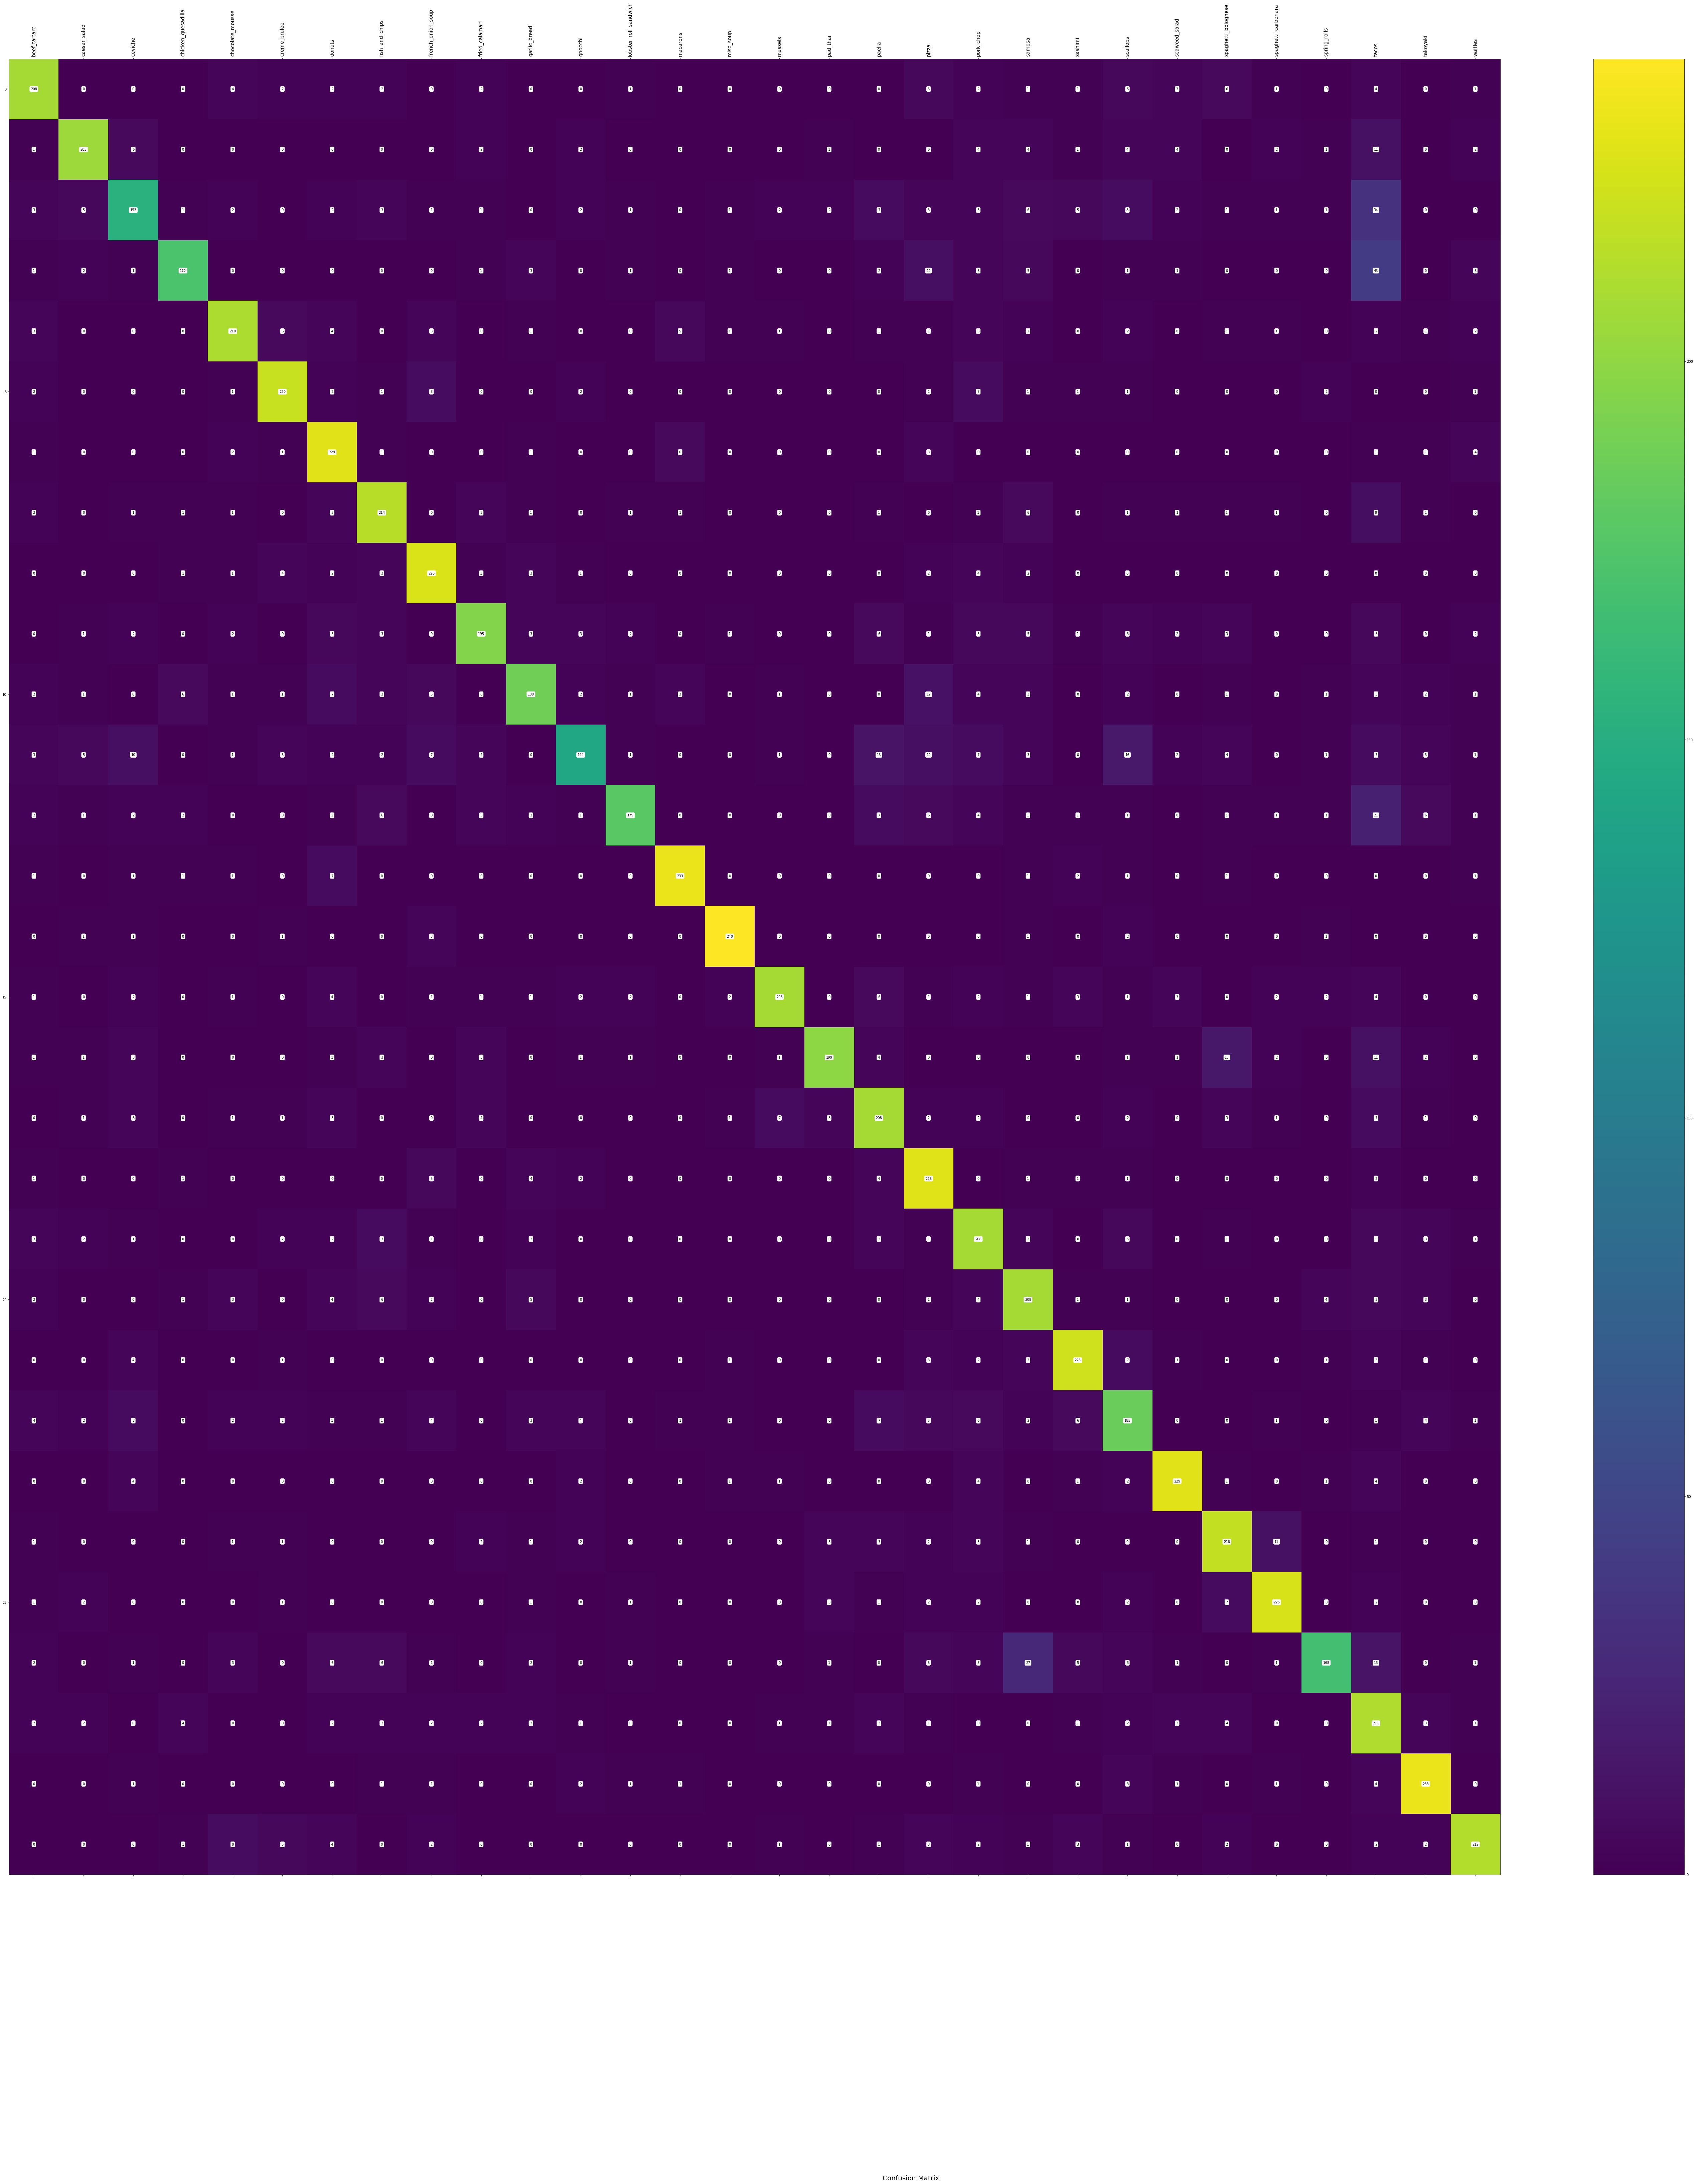

In [6]:
fig, ax = plt.subplots(figsize=(100,100))
x = ax.matshow(conf_matrix,aspect="auto")
for i in range(no_of_class):
    for j in range(no_of_class):
        text = ax.text(j, i, conf_matrix[i, j],
                       ha="center", va="center", bbox=dict(boxstyle='round', facecolor='white', edgecolor='1'))
plt.colorbar(x)
fig.suptitle("Confusion Matrix", fontsize=20, y = -0.0000000000000001)
ax.set_xticklabels(class_names,fontsize=15)
plt.xticks(rotation=90)
ax.set_xticks(np.arange(len(class_names)))
plt.savefig("30_exp2_resnet_svm.png",bbox_inches='tight')
plt.show()

In [7]:
class_acc = (np.diag(conf_matrix)/conf_matrix.sum(1))*100
c,a = zip(*sorted(zip(class_acc,class_names), reverse=True))
for x,y in zip(c,a):
    print(x, " - ", y)

96.0  -  miso_soup
93.2  -  takoyaki
93.2  -  macarons
91.60000000000001  -  seaweed_salad
91.60000000000001  -  donuts
91.2  -  pizza
90.4  -  french_onion_soup
90.0  -  spaghetti_carbonara
89.2  -  sashimi
88.0  -  creme_brulee
87.2  -  spaghetti_bolognese
85.6  -  fish_and_chips
84.8  -  waffles
84.39999999999999  -  tacos
84.0  -  chocolate_mousse
83.2  -  samosa
83.2  -  pork_chop
83.2  -  paella
83.2  -  mussels
83.2  -  beef_tartare
82.0  -  caesar_salad
79.60000000000001  -  pad_thai
78.0  -  fried_calamari
75.2  -  garlic_bread
74.0  -  scallops
71.6  -  lobster_roll_sandwich
68.8  -  chicken_quesadilla
67.2  -  spring_rolls
61.199999999999996  -  ceviche
57.599999999999994  -  gnocchi


In [ ]:
print(conf_matrix)
np.savetxt('data_resnet.csv', conf_matrix, delimiter=',')

[[104   0   0 ...   1   0   5]
 [  0 175   0 ...   0   0   1]
 [  8   0 186 ...   0   1   0]
 ...
 [  3   0   2 ... 169   0   2]
 [  0   0   0 ...   0 134   0]
 [  2   0   0 ...   1   0 208]]
